In [7]:
#Librerías necesarias:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [8]:
#Cargar los datos desde repositorio online:
data = pd.read_csv('https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv',delimiter=',') # Leer el archivo

In [9]:
np.random.seed(12345)     #Para revisiones de los resultados futuras

#División de los datos 
trainx, testx, trainy, testy = train_test_split(data[data.columns[0:-1]],data[data.columns[-1]], train_size=0.75)
#Datos estandarizados
scaler = preprocessing.StandardScaler().fit(trainx)
trainxE=scaler.transform(trainx)
testxE=scaler.transform(testx)

In [10]:
def error(w,x,y):
    pred = x.dot(w.T)
    error = (y-pred)**2
    errores = np.sum(error)
    return errores

def LMS(x,y,eta):
    x = np.insert(np.array(x), 0, 1, axis=1)
    y = np.array(y)
    nr = x.shape[0]
    nc = x.shape[1]
    w = np.random.random((1,nc))
    errores = []
    for i in range(0,nr):
        w = w + eta*(y[i] - np.dot(x[i],w.T))*x[i]
        errores.append(error(w,x,y))
        
    errores = np.array(errores)
    print errores.shape
    #Graficar error:
    plt.plot(range(0,nr),errores)
    plt.title('Progreso del error')
    plt.show()
    print 'Coeficientes: ',w
    
    return w
    
def testLMS(x,y,w,indiceG=1):
    x = np.insert(np.array(x), 0, 1, axis=1)
    nr = x.shape[0]
    y = np.array(y)
    pred = np.dot(x,w.T)
    plt.scatter(x[:,indiceG],y, color='black')
    plt.scatter(x[:,indiceG],pred)
    ecm = (1.0/len(y))*np.abs(np.sum(np.array(y)-pred))
    print '\n Error medio: %f' % ecm
    plt.title('Regresion lineal usando parametros de W')
    print '\n Ordenada: %f, Pendiente: %f' % (w[0,0], w[0,1])
    plt.show()
    return ecm


(771,)


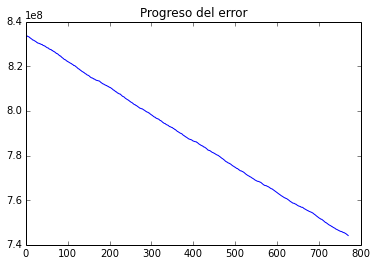

Coeficientes:  [[ 2.50290128  1.92905727]]

 Error medio: 7829.157372

 Ordenada: 2.502901, Pendiente: 1.929057


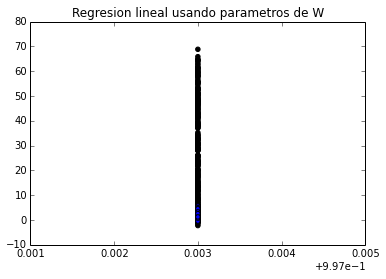

7829.1573716950306

In [11]:
w = LMS(trainxE,trainy,0.0001)
testLMS(testxE,testy,w,0)

(771,)


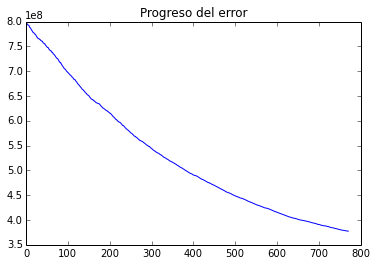

Coeficientes:  [[ 18.16217709   9.69879082]]

 Error medio: 3799.310371

 Ordenada: 18.162177, Pendiente: 9.698791


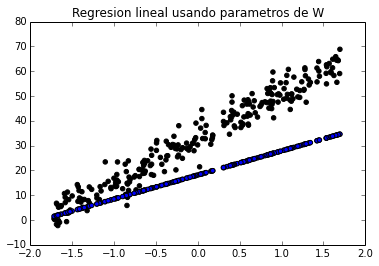

3799.3103711383446

In [12]:
w = LMS(trainxE,trainy,0.001)
testLMS(testxE,testy,w)

(771,)


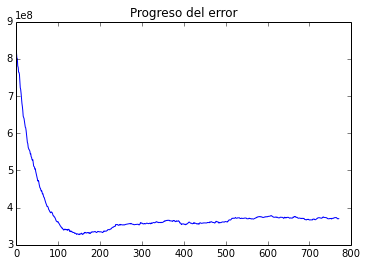

Coeficientes:  [[ 32.86308634  17.30820115]]

 Error medio: 16.510521

 Ordenada: 32.863086, Pendiente: 17.308201


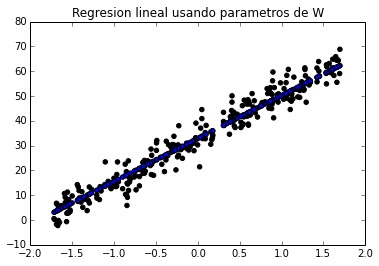

16.510521140441718

In [13]:
w = LMS(trainxE,trainy,0.01)
testLMS(testxE,testy,w)

(771,)


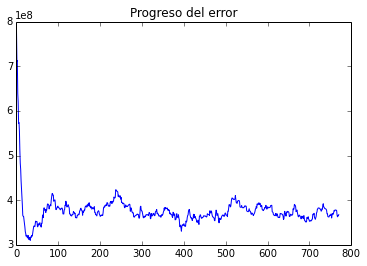

Coeficientes:  [[ 32.38057325  17.16319306]]

 Error medio: 140.807673

 Ordenada: 32.380573, Pendiente: 17.163193


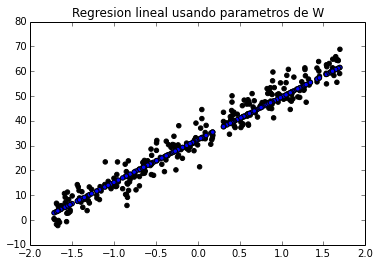

140.80767330182695

In [14]:
w = LMS(trainxE,trainy,0.05)
testLMS(testxE,testy,w)

(771,)


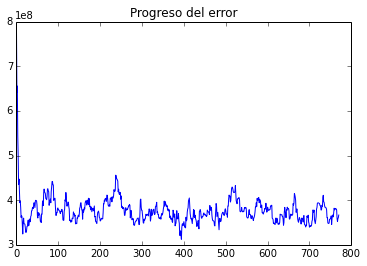

Coeficientes:  [[ 32.29404102  17.1180231 ]]

 Error medio: 163.073421

 Ordenada: 32.294041, Pendiente: 17.118023


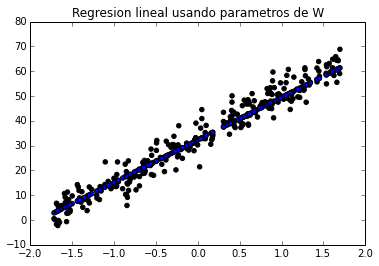

163.07342064225872

In [15]:
w = LMS(trainxE,trainy,0.1)
testLMS(testxE,testy,w)

(771,)


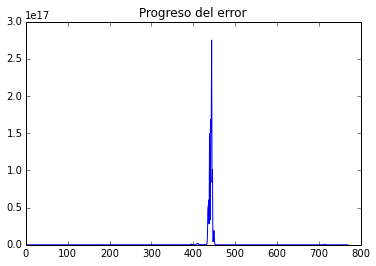

Coeficientes:  [[ 55.49955088  31.57167174]]

 Error medio: 5804.887700

 Ordenada: 55.499551, Pendiente: 31.571672


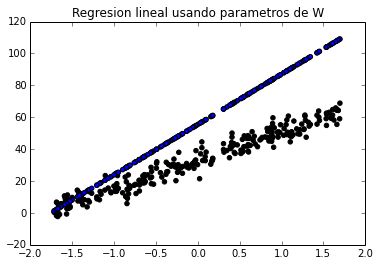

5804.8877003680836

In [16]:
w = LMS(trainxE,trainy,1)
testLMS(testxE,testy,w)